In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit
import sympy as sp

In [3]:
data1=pd.read_excel("100G_lndem_3D data.xlsx")
df1=pd.DataFrame(data1)
print(df1)
data2=pd.read_excel("200G_lndem_3D data.xlsx")
df2=pd.DataFrame(data2)
print(df2)
data3=pd.read_excel("300G_lndem_3D data.xlsx")
df3=pd.DataFrame(data3)
print(df3)

     Spicules  Height[i]  Height (Mm)
0         336        165     5.982916
1         325        168     6.185862
2         329        171     6.388808
3         326        174     6.591754
4         318        177     6.794700
..        ...        ...          ...
106        23        483    27.495193
107        19        486    27.698139
108        17        489    27.901085
109        17        492    28.104031
110        16        495    28.306977

[111 rows x 3 columns]
    Spicules  Height[i]  Height (Mm)
0        148        180     6.997646
1        152        183     7.200592
2        142        186     7.403538
3        134        189     7.606484
4        137        192     7.809430
..       ...        ...          ...
70         1        390    21.203867
71         2        393    21.406813
72         1        396    21.609759
73         1        399    21.812705
74         0        402    22.015651

[75 rows x 3 columns]
    Spicules  Height[i]  Height (Mm)
0        185    

In [4]:
H_ind1=df1.loc[:,"Height[i]"]
H_Mm1=df1.loc[:,"Height (Mm)"]
nspic1=df1.loc[:,"Spicules"]
H_ind2=df2.loc[:,"Height[i]"]
H_Mm2=df2.loc[:,"Height (Mm)"]
nspic2=df2.loc[:,"Spicules"]
H_ind3=df3.loc[:,"Height[i]"]
H_Mm3=df3.loc[:,"Height (Mm)"]
nspic3=df3.loc[:,"Spicules"]

In [5]:
L_nspic1=[]

for i in range(len(H_ind1)):
    nspic_l=nspic1[0]-nspic1[i]
    L_nspic1.append(nspic_l)
    
print(L_nspic1)

L_nspic2=[]

for i in range(len(H_ind2)):
    nspic_l=nspic2[0]-nspic2[i]
    L_nspic2.append(nspic_l)
    
print(L_nspic2)

L_nspic3=[]

for i in range(len(H_ind3)):
    nspic_l=nspic3[0]-nspic3[i]
    L_nspic3.append(nspic_l)
    
print(L_nspic3)

[0, 11, 7, 10, 18, 16, 23, 41, 44, 41, 40, 52, 59, 58, 67, 54, 78, 86, 94, 99, 110, 118, 123, 129, 129, 134, 142, 156, 163, 166, 176, 178, 179, 180, 184, 186, 188, 187, 203, 207, 209, 215, 218, 224, 221, 222, 227, 223, 226, 229, 237, 240, 240, 242, 245, 251, 256, 262, 262, 263, 265, 267, 273, 274, 275, 274, 277, 279, 282, 285, 286, 290, 295, 291, 291, 291, 291, 291, 291, 292, 292, 296, 295, 297, 298, 299, 299, 300, 299, 301, 301, 306, 308, 310, 312, 311, 310, 312, 313, 312, 313, 313, 310, 310, 308, 312, 313, 317, 319, 319, 320]
[0, -4, 6, 14, 11, 3, 5, 12, 13, 12, 19, 20, 27, 32, 34, 36, 46, 52, 53, 56, 60, 62, 69, 73, 77, 82, 87, 90, 93, 99, 104, 106, 108, 112, 112, 114, 114, 115, 118, 122, 126, 124, 127, 127, 127, 125, 126, 127, 128, 127, 129, 131, 130, 131, 132, 134, 136, 137, 137, 141, 140, 140, 140, 142, 142, 143, 143, 145, 146, 146, 147, 146, 147, 147, 148]
[0, -1, 6, 17, 12, 10, 18, 19, 20, 28, 36, 41, 52, 59, 61, 63, 71, 75, 76, 82, 86, 91, 95, 102, 110, 118, 119, 120, 128, 134

In [6]:
H_norm1=[]
H_min1=np.min(H_Mm1)
H_max1=np.max(H_Mm1)
for i in range(0,len(H_ind1)):
    normal_height=(H_Mm1[i]-H_min1)/(H_max1-H_min1)
    H_norm1.append(normal_height)

print(H_norm1)

H_norm2=[]
H_min2=np.min(H_Mm2)
H_max2=np.max(H_Mm2)
for i in range(0,len(H_ind2)):
    normal_height=(H_Mm2[i]-H_min2)/(H_max2-H_min2)
    H_norm2.append(normal_height)

print(H_norm2)

H_norm3=[]
H_min3=np.min(H_Mm3)
H_max3=np.max(H_Mm3)
for i in range(0,len(H_ind3)):
    normal_height=(H_Mm3[i]-H_min3)/(H_max3-H_min3)
    H_norm3.append(normal_height)

print(H_norm3)

[0.0, 0.00909090909090908, 0.01818181818181816, 0.027272727272727244, 0.03636363636363632, 0.045454545454545484, 0.054545454545454564, 0.06363636363636364, 0.07272727272727272, 0.08181818181818176, 0.09090909090909088, 0.09999999999999996, 0.10909090909090904, 0.11818181818181812, 0.1272727272727273, 0.13636363636363638, 0.14545454545454545, 0.15454545454545454, 0.1636363636363636, 0.1727272727272727, 0.18181818181818185, 0.19090909090909094, 0.2, 0.2090909090909092, 0.21818181818181825, 0.22727272727272735, 0.23636363636363641, 0.2454545454545455, 0.2545454545454546, 0.26363636363636367, 0.27272727272727276, 0.2818181818181818, 0.290909090909091, 0.30000000000000004, 0.30909090909090914, 0.31818181818181823, 0.3272727272727273, 0.33636363636363636, 0.34545454545454546, 0.35454545454545455, 0.3636363636363637, 0.3727272727272728, 0.3818181818181819, 0.39090909090909093, 0.4, 0.4090909090909091, 0.4181818181818182, 0.42727272727272725, 0.43636363636363645, 0.4454545454545455, 0.45454545

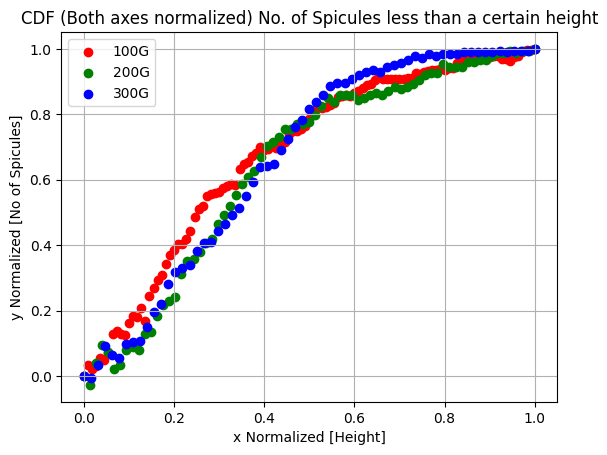

In [15]:
plt.scatter(H_norm1, L_nspic1/L_nspic1[len(H_ind1)-1], color='red', label= '100G')
plt.scatter(H_norm2, L_nspic2/L_nspic2[len(H_ind2)-1], color='green', label="200G")
plt.scatter(H_norm3, L_nspic3/L_nspic3[len(H_ind3)-1], color='blue', label='300G')
'''plt.xlim(-4.5, 0.5)
plt.ylim(-4.5, 0.5)
ticks=[-5,-4,-3,-2,-1,0,1]
plt.xticks(ticks)
plt.yticks(ticks)'''
plt.title("CDF (Both axes normalized) No. of Spicules less than a certain height")
plt.xlabel('x-axis (Normalized Height)')
plt.ylabel('y-axis (Normalized No of Spicules)')
plt.grid()
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2472421671.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(H_norm1), np.log(L_nspic1/L_nspic1[len(H_ind1)-1]), color='red', label= '100G', s=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2472421671.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(H_norm2), np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2472421671.py:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(H_norm2), np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2472421671.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(H_norm3), np.log(L_nspic3/L_nspic3[len(H_ind3)-1]), color='blue', label='300G', s=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2472421671.py:3: RuntimeWarning: invalid value encountered in log
  

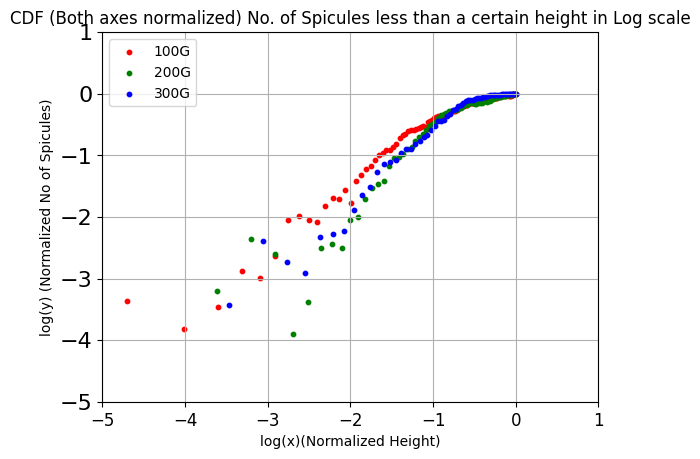

In [41]:
plt.scatter(np.log(H_norm1), np.log(L_nspic1/L_nspic1[len(H_ind1)-1]), color='red', label= '100G', s=10)
plt.scatter(np.log(H_norm2), np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=10)
plt.scatter(np.log(H_norm3), np.log(L_nspic3/L_nspic3[len(H_ind3)-1]), color='blue', label='300G', s=10)
plt.xlim(-4.5, 0.5)
plt.ylim(-4.5, 0.5)
ticks=[-5,-4,-3,-2,-1,0,1]
plt.xticks(ticks)
plt.yticks(ticks)
plt.title("CDF (Both axes normalized) No. of Spicules less than a certain height in Log scale")
plt.xlabel('log(x)(Normalized Height)')
plt.ylabel('log(y) (Normalized No of Spicules)')
plt.grid()
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14008\165092979.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(H_Mm1, np.log(L_nspic1/L_nspic1[len(H_ind1)-1]), color='red', label= '100G', s=6)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\165092979.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(H_Mm2, np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=6)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\165092979.py:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(H_Mm2, np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=6)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\165092979.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(H_Mm3, np.log(L_nspic3/L_nspic3[len(H_ind3)-1]), color='blue', label='300G', s=6)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\165092979.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(H_Mm3, np.log(L_nspic3/L_nspic3[len(H

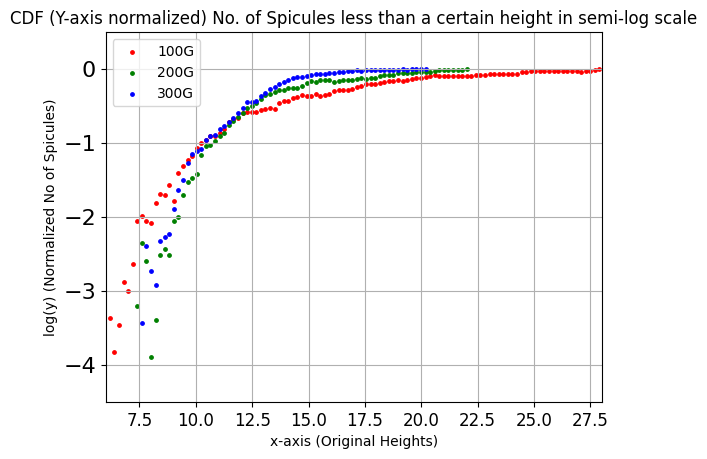

In [38]:
plt.scatter(H_Mm1, np.log(L_nspic1/L_nspic1[len(H_ind1)-1]), color='red', label= '100G', s=6)
plt.scatter(H_Mm2, np.log(L_nspic2/L_nspic2[len(H_ind2)-1]), color='green', label="200G", s=6)
plt.scatter(H_Mm3, np.log(L_nspic3/L_nspic3[len(H_ind3)-1]), color='blue', label='300G', s=6)
plt.xlim(6, 28)
plt.ylim(-4.5, 0.5)
'''ticks=[-5,-4,-3,-2,-1,0,1]
plt.xticks(ticks)
plt.yticks(ticks)'''
plt.title("CDF (Y-axis normalized) No. of Spicules less than a certain height in semi-log scale")
plt.xlabel('x-axis (Original Heights)')
plt.ylabel('log(y) (Normalized No of Spicules)')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=16)
plt.grid()
plt.legend()
plt.show()